In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import metrics

In [0]:
#read data from csv
data = pd.read_csv('http://gunet2.cs.unipi.gr/modules/document/file.php/TMI100/Datasets/bankruptcy.csv')
#set name of target variable (column name)
target_var = 'Bankrupt'
#set criterion ["gini", "entropy"]
criterion = 'gini'

In [3]:
data = data.sample(frac=1).reset_index(drop=True)
data.sample(n=5)


,Company,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
43,Teligent,20.6,-146.3,-36.0,12.6,0.075,yes
22,Gilat Satellite Networks,43.1,-0.4,3.4,40.0,0.925,no
45,WebLink Wireless,-127.5,-121.3,6.4,65.7,0.248,yes
28,Verizon Communications,-7.4,8.9,15.3,39.3,1.273,no
14,SBC Communications,-7.2,18.6,20.8,52.2,2.413,no


In [4]:
#Get data columns
columns = list(data.columns)
columns

['Company', 'WC/TA', 'RE/TA', 'EBIT/TA', 'S/TA', 'BVE/BVL', 'Bankrupt']

In [5]:
#create feature columns by removing target variable
# 'Company' column 
feature_cols = [x for x in columns if x not in ['Company', target_var]]
feature_cols

['WC/TA', 'RE/TA', 'EBIT/TA', 'S/TA', 'BVE/BVL']

In [0]:
X = data[feature_cols] # Features
y = data[target_var] # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
y_test


27     no
35    yes
40    yes
38     no
2     yes
3     yes
48     no
29     no
46     no
31    yes
Name: Bankrupt, dtype: object

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion=criterion)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


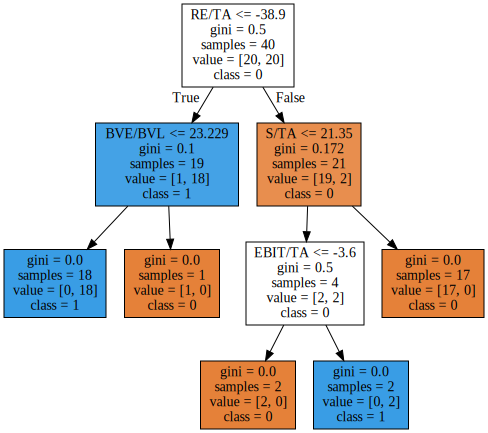

In [9]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=feature_cols, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [10]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array(['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes'],
      dtype=object)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [12]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

no     5
yes    5
Name: Bankrupt, dtype: int64

In [13]:
#Confusion matrix
columns_cm = ['Predicted Negative', 'Predicted Positive']
rows_cm = ['Actual Negative', 'Actual Positive']
#Calculate confusion matrix array values
values_cm = metrics.confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(values_cm, index=rows_cm, columns=columns_cm)

# #Total sum per column: 
conf_matrix.loc['Total',:]= (conf_matrix.sum(axis=0))

#Total sum per row: 
conf_matrix.loc[:,'Total'] = (conf_matrix.sum(axis=1)).astype(int)

conf_matrix.loc[:,'Predicted Negative'] =conf_matrix.loc[:,'Predicted Negative'].astype(int) 
conf_matrix.loc[:,'Predicted Positive'] =conf_matrix.loc[:,'Predicted Positive'].astype(int) 
conf_matrix

,Predicted Negative,Predicted Positive,Total
Actual Negative,3,2,5
Actual Positive,0,5,5
Total,3,7,10


In [14]:
values_cm

array([[3, 2],
       [0, 5]])

In [15]:
conf_matrix.dtypes

Predicted Negative    int64
Predicted Positive    int64
Total                 int64
dtype: object

In [16]:
TP = values_cm[1][1]
print('True Positives:', TP)
TN = values_cm[0][0]
print('True Negatives:', TN)
FP = values_cm[0][1]
print('False Positives:', FP)
FN = values_cm[1][0]
print('False Negatives:', FN)

True Positives: 5
True Negatives: 3
False Positives: 2
False Negatives: 0


In [17]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
print(f'Accuracy: {round(conf_accuracy,2)}')

# calculate error rate
conf_error_rate = (float (FP+FN) / float(TP + TN + FP + FN))
print(f'Error Rate: {round(conf_error_rate,2)}')

# calculate sensitivity
conf_sensitivity = (TP / float(TP + FN))
print(f'Sensitivity: {round(conf_sensitivity,2)}')

# calculate specificity
conf_specificity = (TN / float(TN + FP))
print(f'Specificity: {round(conf_specificity,2)}')

# calculate false positive rate
conf_false_positive_rate = (FP / float(TN + FP))
print(f'False Positive Rate: {round(conf_false_positive_rate,2)}')

# calculate false negative rate
conf_false_negative_rate = (FN / float(TP + FN))
print(f'False Negative Rate: {round(conf_false_negative_rate,2)}')

# calculate precision
conf_precision = (TP / float(TP + FP))
print(f'Precision: {round(conf_precision,2)}')

# calculate recall
conf_recall = (TP / float(TP + FN))
print(f'Recall: {round(conf_recall,2)}')

# calculate score
conf_score =  2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print(f'Score: {round(conf_score,2)}')

Accuracy: 0.8
Error Rate: 0.2
Sensitivity: 1.0
Specificity: 0.6
False Positive Rate: 0.4
False Negative Rate: 0.0
Precision: 0.71
Recall: 1.0
Score: 0.83
